### Импорт данных и установка random_state

In [1]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

RS=44

iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target

### Разделение данных на train/test

#### Случайное разбиение в нужной пропорции

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RS)

### Шкалирование: стандартизация, нормализация, бинаризация

#### Standartization (вычесть среднее, поделить на дисперсию)

In [3]:
from sklearn.preprocessing import StandardScaler
# обучаем только на train
scaler = StandardScaler().fit(X_train)
# далее преобразуем и train и test обученным на train оценщиком
X_train_standarted = scaler.transform(X_train)
X_test_standarted = scaler.transform(X_test)

#### Normalization (вычесть минимум, поделить на разницу между максимумом и минимумом)

In [4]:
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X_train)
X_train_normalized = scaler.transform(X_train)
X_test_normalized = scaler.transform(X_test)

#### Binarization (по порогу)

In [5]:
from sklearn.preprocessing import Binarizer
binarizer = Binarizer(threshold=0.0).fit(X) # fit does nothing.
X_train_binarizeded = binarizer.transform(X_train)
X_test_binarizeded = binarizer.transform(X_test)

#### Еще методы предобработки:

from sklearn.preprocessing import LabelEncoder, Imputer, PolynomialFeatures

### Модели с учителем

In [6]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

from sklearn.svm import SVC # Support Vector Machines (SVM)
svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

from sklearn.naive_bayes import GaussianNB # Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)

from sklearn import neighbors # k near neighbors
knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict_proba(X_test) # вероятности принадлежности к классу (кластеру)
y_pred = knn.predict(X_test)

from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=RS)
sgd_clf.fit(X_train, y_train)
y_pred = sgd_clf.predict(X_test)

### Модели без учителя

In [7]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca_model = pca.fit_transform(X_train)

from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, random_state=RS)
k_means.fit(X_train)
y_pred = k_means.predict(X_test)

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth=5)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

### Оценка качества (производительности) работы алгоритмов

In [8]:
knn.score(X_test, y_test) # mean accuracy on the given test data and labels

0.7

#### Accuracy

In [9]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.16666666666666666

#### Precision

In [10]:
y_pred > 0 / 1

array([False,  True,  True,  True, False,  True, False, False, False,
        True,  True, False,  True,  True,  True,  True, False, False,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False])

In [11]:
from sklearn.metrics import precision_score
precision_score(y_test, y_pred, average='weighted')

0.2

#### Recall

In [12]:
from sklearn.metrics import recall_score
recall_score(y_test, y_pred, average='weighted')

0.16666666666666666

#### Precision-Recall curve

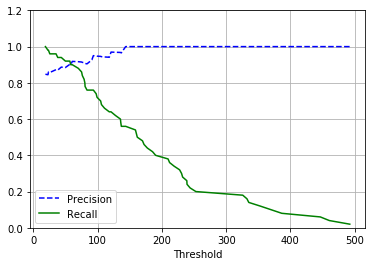

In [13]:
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

idx = np.where(iris.target<2)[0] # оставим только класс 0 и 1
X_, y_ = iris.data[idx, :2], iris.target[idx]

# это оценки, которые дает классификатор обоим классам
y_scores = cross_val_predict(sgd_clf, X_, y_, cv=4, method='decision_function')

# в зависимости от порога меняются соотношения precision/recall.
# Предлагается выбирать порог осмысленно, например, на пересечении кривых
precisions, recalls, thresholds = precision_recall_curve(y_, y_scores)

plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
plt.xlabel("Threshold")
plt.legend()
plt.grid()
plt.ylim([0,1.2]);

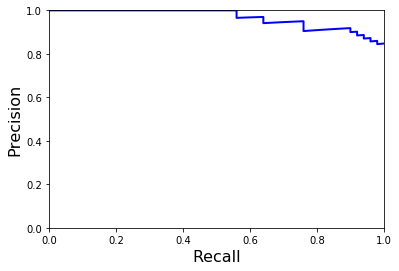

<Figure size 576x432 with 0 Axes>

In [14]:
plt.plot(recalls, precisions, "b-", linewidth=2)
plt.xlabel("Recall", fontsize=16)
plt.ylabel("Precision", fontsize=16)
plt.axis([0, 1, 0, 1])
plt.figure(figsize=(8, 6))
plt.show();

#### Три в одном отчете: precision, recall, f1-score

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           1       0.00      0.00      0.00         9
           2       0.50      0.42      0.45        12

    accuracy                           0.17        30
   macro avg       0.17      0.14      0.15        30
weighted avg       0.20      0.17      0.18        30



In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[0 9 0]
 [4 0 5]
 [7 0 5]]


#### ROC-AUC

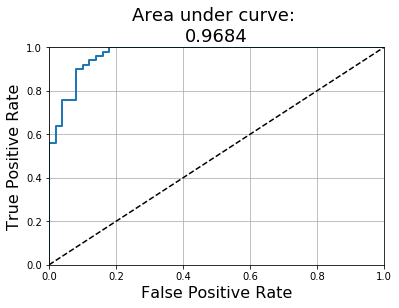

In [17]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_, y_scores)
area = roc_auc_score(y_, y_scores)

plt.plot(fpr, tpr, linewidth=2)
plt.plot([0, 1], [0, 1], 'k--')
plt.axis([0, 1, 0, 1])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.grid()
plt.title(f'Area under curve: \n{area}', fontsize=18)
plt.show()

#### Early stopping (когда сделать раннее прекращение обучения)

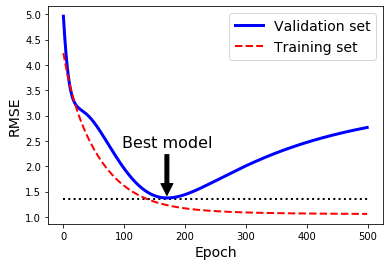

In [18]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

np.random.seed(38)
m = 100
X_rand = 6 * np.random.rand(m, 1) - 3
y_rand = 2 + X_rand + 0.5 * X_rand**2 + np.random.randn(m, 1)

X_train_rand, X_val_rand, y_train_rand, y_val_rand = \
train_test_split(X_rand[:50], y_rand[:50].ravel(), test_size=0.5, random_state=10)

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler()),
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train_rand)
X_val_poly_scaled = poly_scaler.transform(X_val_rand)

sgd_reg = SGDRegressor(max_iter=1,
                       tol=-np.infty,
                       penalty=None,
                       eta0=0.0005,
                       warm_start=True,
                       learning_rate="constant",
                       random_state=42)

n_epochs = 500
train_errors, val_errors = [], []
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled, y_train_rand)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_rand, y_train_predict))
    val_errors.append(mean_squared_error(y_val_rand, y_val_predict))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])

plt.annotate('Best model',
             xy=(best_epoch, best_val_rmse),
             xytext=(best_epoch, best_val_rmse + 1),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05),
             fontsize=16,
            )

best_val_rmse -= 0.03  # just to make the graph look better
plt.plot([0, n_epochs], [best_val_rmse, best_val_rmse], "k:", linewidth=2)
plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(train_errors), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

#### Кривая обучения (чтобы увидеть момент начала переобучения)

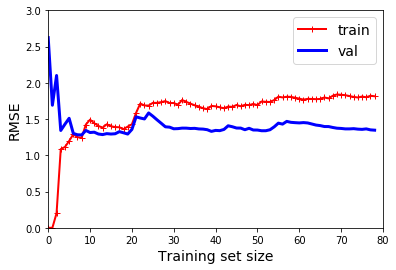

In [19]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_rand, y_rand)
plt.axis([0, 80, 0, 3])                         # not shown in the book
plt.show()

### Метрики качества для регрессий

#### MAE (Mean Absolute Error)

In [20]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

1.0666666666666667

#### MSE (Mean Squared Error)

In [21]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_pred)

1.5333333333333334

#### R^2 Score

\begin{equation*}
R^2 = 1 - \frac{\sum_{k=1}^m (\hat{y_{i}}-y_{i})^2}{\sum_{k=1}^m (\bar{y}-y_{i})^2}
\end{equation*}

In [22]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-1.2222222222222219

### Метрики качества для алгоритмов кластеризации

#### ARI (Adjusted Rand Index)

In [23]:
from sklearn.metrics import adjusted_rand_score
adjusted_rand_score(y_test, y_pred)

0.42464545521346175

#### Homogeneity score

Показатель однородности маркировки кластера с учетом фактов.
Результат кластеризации считается однородным, если все его кластеры содержат только точки данных, которые являются членами одного класса.

In [24]:
from sklearn.metrics import homogeneity_score
homogeneity_score(y_test, y_pred)

0.5670930407227018

#### V-measure

Соотношение отднородности и полноты. Подробнее: http://espressocode.top/ml-v-measure-for-evaluating-clustering-performance/

In [25]:
from sklearn.metrics import v_measure_score
v_measure_score(y_test, y_pred)

0.565438267319535

### Метрики качества для кластеризации

In [78]:
from sklearn.datasets import make_moons, make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, AffinityPropagation
from sklearn.metrics import adjusted_rand_score, silhouette_score

X_clust, y_clust = make_moons(n_samples=200, noise=0.05, random_state=0)
scaler = StandardScaler()
X_clust_scaled = scaler.fit_transform(X_clust)

algorithms = [
    AffinityPropagation(),
    KMeans(n_clusters=2),
    AgglomerativeClustering(n_clusters=2),
    DBSCAN(),
]

clusters_random = np.random.randint(low=0, high=2, size=len(X_clust))

def get_descr(algo_name, y, y_pred, X):
    """считает 2 метрики качества и генерирует заголовки для графиков"""
    return "{}\nARI {:.2f}\nSilhouette {:.2f}".format(
        algo_name,
        adjusted_rand_score(y, y_pred),
        silhouette_score(X, y_pred)
    )

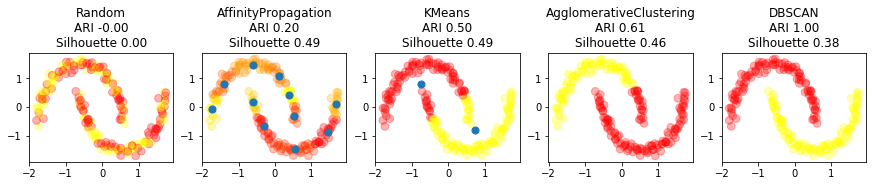

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(15, 2))
alpha = 0.3
axes[0].scatter(X_clust_scaled[:, 0], X_clust_scaled[:, 1], c=clusters_random, cmap='autumn', s=60, alpha=alpha)
axes[0].set_title(get_descr("Random", y_clust, clusters_random, X_clust_scaled))
for ax, algorithm in zip(axes[1:], algorithms):
    # кластеризуем и выводим картинку
    clusters = algorithm.fit_predict(X_clust_scaled)
    ax.scatter(X_clust_scaled[:, 0], X_clust_scaled[:, 1], c=clusters, cmap='autumn', s=60, alpha=alpha)
    ax.set_title(get_descr(algorithm.__class__.__name__, y_clust, clusters, X_clust_scaled))
    
    # если есть центры кластеров - выведем их
    if algorithm.__class__.__name__ in {'KMeans', 'AffinityPropagation'}:
        centers = algorithm.cluster_centers_
        ax.scatter(centers[:, 0], centers[:, 1], s=50)

#### Подбор количества кластеров

KMeans минимизирует сумму квадратов расстояний объектов классов до их центроидов (**Инерция**). В обученном классификаторе это значение находится в поле inertia_. Посчитаем значения inertia при разном количестве кластеров. Они объективно стремятся к нулю с ростом числа кластеров (предельный случай: каждый объект - кластер, расстояние = 0)

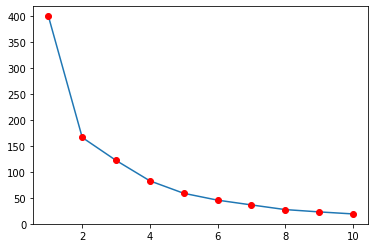

In [80]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_clust_scaled, )
    k_inertia.append(clf_kmeans.inertia_)
    
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

Как подобрать оптимальное значение? Будем на каждом шаге смотреть изменение inertia, и в тот момент, когда оно резко замедлится (относительно предыдущего изменения) мы и остановимся.

Для начала считаем сами изменения.

$${inertia_{k+1}-inertia_{k}}$$

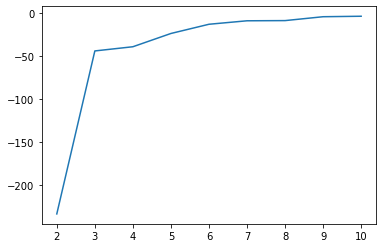

In [82]:
diff = np.diff(k_inertia)
plt.plot(ks[1:], diff);

Теперь можно найти оптимальное число кластеров по этой формуле:

$$k_{opt} = argmin(\frac{inertia_{k+1}-inertia_{k}}{inertia_{k}-inertia_{k-1}})$$

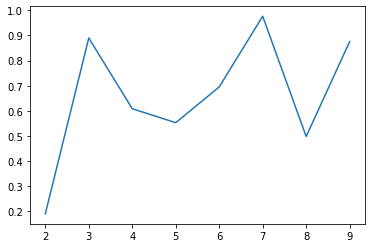

In [83]:
diff_r = diff[1:] / diff[:-1]
plt.plot(ks[1:-1], diff_r);

In [84]:
k_opt = ks[np.argmin(diff_r)+1]
print("Оптимальное количество кластеров (но это не точно):", k_opt)

Оптимальное количество кластеров (но это не точно): 2


### Кросс-валидация (K-fold) и комбинаторный перебор параметров (Grid search)

#### K-Fold (без соблюдения пропорций классов)

In [26]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(knn, X_train, y_train, cv=4, scoring='accuracy'))

[0.8 0.8 0.7 0.9]


#### K-Fold (с соблюдением пропорций классов)

In [27]:
from sklearn.model_selection import StratifiedKFold
skfolds = StratifiedKFold(n_splits=4, random_state=RS, shuffle=True)

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
cross_val_score_strat_list = []

for train_index, test_index in skfolds.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    cross_val_score_strat_list.append(round(acc, 8))

print(cross_val_score_strat_list)

[0.73684211, 0.73684211, 0.7027027, 0.81081081]


#### Grid Search

In [28]:
from sklearn.model_selection import GridSearchCV
import numpy as np
params = {"n_neighbors": np.arange(1,3), "metric": ["euclidean", "cityblock"]}
grid = GridSearchCV(estimator=knn,param_grid=params)
grid.fit(X_train, y_train)
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_estimator_.n_neighbors)

0.7434782608695653
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform')
2


#### Randomized search

В зависимости от дозволенного количества итераций алгоритм опробует случайно выбранные параметры (а не заданные, как в Grid search).

In [29]:
from sklearn.model_selection import RandomizedSearchCV
params = {"n_neighbors": range(1,5), "weights": ["uniform", "distance"]}
rsearch = RandomizedSearchCV(estimator=knn, param_distributions=params, cv=4,n_iter=8,random_state=5)
rsearch.fit(X_train, y_train)
print(rsearch.best_score_)
print(rsearch.best_estimator_)
print(rsearch.best_estimator_.n_neighbors)

0.7441502463054188
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='distance')
3


### Прочее

#### Визуализация дерева решений

In [30]:
from sklearn.tree import export_graphviz

print(export_graphviz(dtc, 
                      out_file=None, 
                      filled=True, 
                      feature_names=iris.feature_names[:2], 
                      class_names=list(iris.target_names))
     )

digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="sepal length (cm) <= 5.45\ngini = 0.666\nsamples = 120\nvalue = [41, 41, 38]\nclass = setosa", fillcolor="#ffffff"] ;
1 [label="sepal width (cm) <= 2.8\ngini = 0.214\nsamples = 41\nvalue = [36, 5, 0]\nclass = setosa", fillcolor="#e99254"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="gini = 0.0\nsamples = 4\nvalue = [0, 4, 0]\nclass = versicolor", fillcolor="#39e581"] ;
1 -> 2 ;
3 [label="sepal length (cm) <= 5.35\ngini = 0.053\nsamples = 37\nvalue = [36, 1, 0]\nclass = setosa", fillcolor="#e6843e"] ;
1 -> 3 ;
4 [label="gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]\nclass = setosa", fillcolor="#e58139"] ;
3 -> 4 ;
5 [label="sepal width (cm) <= 3.2\ngini = 0.278\nsamples = 6\nvalue = [5, 1, 0]\nclass = setosa", fillcolor="#ea9a61"] ;
3 -> 5 ;
6 [label="gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor", fillcolor="#39e581"] ;
5 -> 6 ;
7 [label="gini = 0.0\nsamples = 5\nvalu

Вставить полученный из функции print вывод сюда: http://www.webgraphviz.com

А можно сразу использовать export_graphviz для сохранения в файл: 

In [ ]:
from sklearn.tree import export_graphviz

DOT_PATH = "filename.dot" 

export_graphviz(
        decision_tree=dtc,
        out_file=image_path("iris_tree.dot"),
        feature_names=iris.feature_names[:2],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

### Сохранить модель

In [31]:
# from sklearn.externals import joblib # deprecated
import joblib
joblib.dump(rsearch.best_estimator_, 'rsearch.best_estimator_.pkl')

['rsearch.best_estimator_.pkl']

##### Логистическая функция

In [48]:
def sigm(t):
    return 1/(1+np.e**(-t))
xx = np.linspace(-10,10, 1000)
yy = sigm(xx)

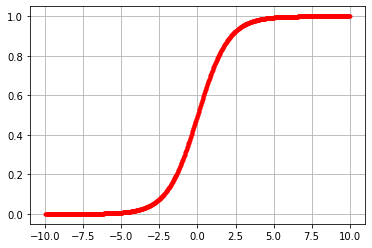

In [51]:
plt.plot(xx,yy, "r.", linewidth=2, label="train")
plt.grid()
plt.show()

/home/admin1/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  


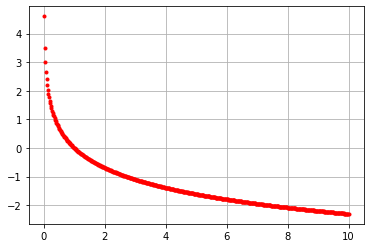

In [64]:
def neg_log(x, y):
    return -1*np.log(x)
xx = np.linspace(-10,10, 1000)
yy = neg_log(xx, 10)

plt.plot(xx,yy, "r.", linewidth=2, label="train")
plt.grid()
plt.show()

In [77]:
-np.log(0.0001)

9.210340371976182